In [1]:
#라이브러리 가져오기
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

In [2]:
file_names = glob('EDA/*.csv')
file_names = sorted(file_names)
file_names

['EDA\\CoffeeBean_list.csv',
 'EDA\\TwoSome_EDA.csv',
 'EDA\\angelinus_cleaning.csv',
 'EDA\\compose_cleaning.csv',
 'EDA\\ediya_last.csv',
 'EDA\\hollys_list.csv',
 'EDA\\mega_cleaning.csv',
 'EDA\\paikscoffee.csv',
 'EDA\\pascucci.csv',
 'EDA\\paulbassett_cleaning_last.csv',
 'EDA\\starbucks_final.csv']

In [3]:
df_list = [pd.read_csv(fn, low_memory=False) for fn in file_names]

len(df_list)

11

In [4]:
df_list[10]

,브랜드명,지점명,시도명,시군구명,주소
0,스타벅스,전북김제DT,전라북도,김제시,전라북도 김제시 검산동 895-86
1,스타벅스,전북남원DT,전라북도,남원시,전라북도 남원시 쌍교동 58-6
2,스타벅스,익산모현,전라북도,익산시,전라북도 익산시 모현동1가 320
3,스타벅스,익산영등DT,전라북도,익산시,전라북도 익산시 영등동 340-11
4,스타벅스,익산영등,전라북도,익산시,전라북도 익산시 영등동 149-1
...,...,...,...,...,...
1782,스타벅스,원주혁신도시,강원도,원주시,강원도 원주시 반곡동 1886-3 골든스퀘어2차 1F
1783,스타벅스,원주터미널,강원도,원주시,강원도 원주시 단계동 882-2 스타벅스 원주터미널점
1784,스타벅스,오크밸리,강원도,원주시,강원도 원주시 지정면 월송리 1061-16 빌리지센터
1785,스타벅스,원주IC DT,강원도,원주시,강원도 원주시 태장동 1286-11286-181286-191286-22


In [5]:
df = pd.concat(df_list)
df.shape

(23316, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23316 entries, 0 to 1786
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   브랜드명    23316 non-null  object
 1   지점명     23316 non-null  object
 2   시도명     23316 non-null  object
 3   시군구명    23316 non-null  object
 4   주소      23316 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [7]:

df['브랜드명'].unique()

array(['커피빈', '투썸플레이스', '엔제리너스', '컴포즈커피', '폴바셋', '빽다방', '파스쿠찌', '이디야',
       '메가커피', '스타벅스', '할리스'], dtype=object)

In [8]:
df['시도명'].unique()

array(['서울특별시', '부산광역시', '인천광역시', '대전광역시', '경기도', '경상남도', '충청북도', '강원도',
       '광주광역시', '대구광역시', '충청남도', '제주특별자치도', '경상북도', '전라북도', '전라남도',
       '울산광역시', '세종특별자치시', '충북'], dtype=object)

In [9]:
# 잘못 표기된 데이터 찾아서 고쳐주기

df.loc[df['시군구명'] == '제주특별자치도', '시군구명'] = '제주시'
df.loc[df['시군구명'] == '여주', '시군구명'] = '여주시'
df.loc[df['시군구명'] == '덕양구', '시군구명'] = '고양시'
df.loc[df['시군구명'] == '홍성읍', '시군구명'] = '홍성군'
df.loc[df['시군구명'] == '금송로', '시군구명'] = '세종특별자치시'
df.loc[df['시군구명'] == '나성로', '시군구명'] = '세종특별자치시'
df.loc[df['시군구명'] == '소담로', '시군구명'] = '세종특별자치시'
df.loc[df['시군구명'] == '절재로', '시군구명'] = '세종특별자치시'
df.loc[df['시군구명'] == '진구', '시군구명'] = '부산진구'
df.loc[df['시도명'] == '충북', '시도명'] = '충청북도'

In [10]:
# df.loc[(df['시도명'].str[-1]=='도') & ~(df['시군구명'].str[-1].isin(['시','군'])),
# '시군구명'] = ['고양시', '여주시', '제주시', '홍성군', '안산시']

In [11]:
df['시군구명'].unique()

array(['강남구', '서초구', '송파구', '종로구', '마포구', '중구', '광진구', '동대문구', '성북구',
       '서대문구', '노원구', '양천구', '영등포구', '금천구', '남동구', '서구', '고양시', '성남시',
       '화성시', '창원시', '청주시', '관악구', '구로구', '강동구', '수원시', '부평구', '김포시',
       '용산구', '이천시', '연수구', '안양시', '강서구', '해운대구', '용인시', '파주시', '군포시',
       '원주시', '중랑구', '평택시', '강북구', '은평구', '부산진구', '광명시', '하남시', '부천시',
       '남양주시', '동구', '남구', '북구', '천안시', '제주시', '진주시', '철원군', '가평군', '안동시',
       '대덕구', '충주시', '익산시', '달성군', '서귀포시', '김해시', '광산구', '유성구', '거제시',
       '포항시', '제천시', '미추홀구', '과천시', '연제구', '경산시', '문경시', '강진군', '삼척시',
       '아산시', '동래구', '안산시', '진천군', '달서구', '청도군', '속초시', '전주시', '성동구',
       '담양군', '고흥군', '시흥시', '군산시', '수성구', '여주시', '순천시', '공주시', '여수시',
       '춘천시', '군위군', '고성군', '나주시', '홍천군', '포천시', '음성군', '의정부시', '구미시',
       '수영구', '연천군', '완주군', '광양시', '계양구', '당진시', '세종특별자치시', '오산시', '양주시',
       '구리시', '기장군', '보령시', '영주시', '사상구', '부여군', '통영시', '예산군', '계룡시',
       '금정구', '의왕시', '무안군', '양평군', '강화군', '영월군', '서산시', '칠곡군', '평창군',
     

In [12]:
df['시도명'].unique()

array(['서울특별시', '부산광역시', '인천광역시', '대전광역시', '경기도', '경상남도', '충청북도', '강원도',
       '광주광역시', '대구광역시', '충청남도', '제주특별자치도', '경상북도', '전라북도', '전라남도',
       '울산광역시', '세종특별자치시'], dtype=object)

In [13]:
df

,브랜드명,지점명,시도명,시군구명,주소
0,커피빈,학동역 DT점,서울특별시,강남구,서울시 강남구 학동로 211 1층
1,커피빈,차병원점,서울특별시,강남구,서울시 강남구 논현로 566 강남차병원1층
2,커피빈,강남대로점,서울특별시,서초구,서울시 서초구 강남대로 369 1층
3,커피빈,청담에스점,서울특별시,강남구,"서울시 강남구 압구정로 461 네이처포엠빌딩B108,109호"
4,커피빈,신사점,서울특별시,강남구,서울시 강남구 도산대로 126
...,...,...,...,...,...
1782,스타벅스,원주혁신도시,강원도,원주시,강원도 원주시 반곡동 1886-3 골든스퀘어2차 1F
1783,스타벅스,원주터미널,강원도,원주시,강원도 원주시 단계동 882-2 스타벅스 원주터미널점
1784,스타벅스,오크밸리,강원도,원주시,강원도 원주시 지정면 월송리 1061-16 빌리지센터
1785,스타벅스,원주IC DT,강원도,원주시,강원도 원주시 태장동 1286-11286-181286-191286-22


In [14]:
df = df[df["브랜드명"].notnull()].copy()
print(df.shape)


(23316, 5)


In [15]:
df['브랜드명'].value_counts()

메가커피      4412
컴포즈커피     3732
스타벅스      3574
투썸플레이스    3122
빽다방       2526
이디야       2519
파스쿠찌      1042
할리스       1040
엔제리너스      611
커피빈        480
폴바셋        258
Name: 브랜드명, dtype: int64

In [16]:
df.nunique()

브랜드명       11
지점명     10064
시도명        17
시군구명      204
주소      13066
dtype: int64

In [17]:
df['시군구명'].unique()

array(['강남구', '서초구', '송파구', '종로구', '마포구', '중구', '광진구', '동대문구', '성북구',
       '서대문구', '노원구', '양천구', '영등포구', '금천구', '남동구', '서구', '고양시', '성남시',
       '화성시', '창원시', '청주시', '관악구', '구로구', '강동구', '수원시', '부평구', '김포시',
       '용산구', '이천시', '연수구', '안양시', '강서구', '해운대구', '용인시', '파주시', '군포시',
       '원주시', '중랑구', '평택시', '강북구', '은평구', '부산진구', '광명시', '하남시', '부천시',
       '남양주시', '동구', '남구', '북구', '천안시', '제주시', '진주시', '철원군', '가평군', '안동시',
       '대덕구', '충주시', '익산시', '달성군', '서귀포시', '김해시', '광산구', '유성구', '거제시',
       '포항시', '제천시', '미추홀구', '과천시', '연제구', '경산시', '문경시', '강진군', '삼척시',
       '아산시', '동래구', '안산시', '진천군', '달서구', '청도군', '속초시', '전주시', '성동구',
       '담양군', '고흥군', '시흥시', '군산시', '수성구', '여주시', '순천시', '공주시', '여수시',
       '춘천시', '군위군', '고성군', '나주시', '홍천군', '포천시', '음성군', '의정부시', '구미시',
       '수영구', '연천군', '완주군', '광양시', '계양구', '당진시', '세종특별자치시', '오산시', '양주시',
       '구리시', '기장군', '보령시', '영주시', '사상구', '부여군', '통영시', '예산군', '계룡시',
       '금정구', '의왕시', '무안군', '양평군', '강화군', '영월군', '서산시', '칠곡군', '평창군',
     

In [18]:
df

,브랜드명,지점명,시도명,시군구명,주소
0,커피빈,학동역 DT점,서울특별시,강남구,서울시 강남구 학동로 211 1층
1,커피빈,차병원점,서울특별시,강남구,서울시 강남구 논현로 566 강남차병원1층
2,커피빈,강남대로점,서울특별시,서초구,서울시 서초구 강남대로 369 1층
3,커피빈,청담에스점,서울특별시,강남구,"서울시 강남구 압구정로 461 네이처포엠빌딩B108,109호"
4,커피빈,신사점,서울특별시,강남구,서울시 강남구 도산대로 126
...,...,...,...,...,...
1782,스타벅스,원주혁신도시,강원도,원주시,강원도 원주시 반곡동 1886-3 골든스퀘어2차 1F
1783,스타벅스,원주터미널,강원도,원주시,강원도 원주시 단계동 882-2 스타벅스 원주터미널점
1784,스타벅스,오크밸리,강원도,원주시,강원도 원주시 지정면 월송리 1061-16 빌리지센터
1785,스타벅스,원주IC DT,강원도,원주시,강원도 원주시 태장동 1286-11286-181286-191286-22


In [19]:
df.duplicated().sum()

10199

In [20]:
df[df.duplicated()]

,브랜드명,지점명,시도명,시군구명,주소
486,투썸플레이스,제주모슬포점,제주특별자치도,서귀포시,제주 서귀포시 대정읍 최남단해안로 44
1304,투썸플레이스,진천터미널점,충청북도,진천군,충북 진천군 진천읍 중앙북1길 3
107,엔제리너스,잠실롯데월드타워31F점,서울특별시,송파구,서울특별시 송파구 올림픽로 300 롯데월드타워앤드롯데월드몰
0,투썸플레이스,철원동송점,강원도,철원군,강원도 철원군 동송읍 금학로 242 (새마을금고) 금학로 242
1,투썸플레이스,수지동천역점,경기도,용인시,"경기도 용인시 수지구 신수로 767 (동천동,분당수지U-TOWER) 에이동 1층 에..."
...,...,...,...,...,...
1782,스타벅스,원주혁신도시,강원도,원주시,강원도 원주시 반곡동 1886-3 골든스퀘어2차 1F
1783,스타벅스,원주터미널,강원도,원주시,강원도 원주시 단계동 882-2 스타벅스 원주터미널점
1784,스타벅스,오크밸리,강원도,원주시,강원도 원주시 지정면 월송리 1061-16 빌리지센터
1785,스타벅스,원주IC DT,강원도,원주시,강원도 원주시 태장동 1286-11286-181286-191286-22


In [21]:
# keep=False로 하면 중복 행을 모두 보여주고 first(기본값)으로 하면 첫번째 행은 안 보여요
df.loc[df.duplicated(keep=False), :].sort_values('지점명')

,브랜드명,지점명,시도명,시군구명,주소
12090,할리스,(논)탄천휴게소2호점,충청남도,공주시,충청남도 공주시 탄천면 논산천안고속도로 27 (탄천하행휴게소) .
3,할리스,(논)탄천휴게소2호점,충청남도,공주시,충청남도 공주시 탄천면 논산천안고속도로 27 (탄천하행휴게소) .
12179,할리스,(논)탄천휴게소점,충청남도,공주시,충청남도 공주시 탄천면 논산천안고속도로 27 (탄천하행휴게소) .
92,할리스,(논)탄천휴게소점,충청남도,공주시,충청남도 공주시 탄천면 논산천안고속도로 27 (탄천하행휴게소) .
442,할리스,(부)치악휴게소점,강원도,원주시,강원도 원주시 신림면 치악로 416 0
...,...,...,...,...,...
1248,메가커피,휘경주공점,서울특별시,동대문구,서울특별시 동대문구 사가정로25길 29
1430,컴포즈커피,흥해남성점,경상북도,포항시,경상북도 포항시 북구 흥해읍 중성로32번길 14 컴포즈커피(흥해남성점)
5208,컴포즈커피,흥해남성점,경상북도,포항시,경상북도 포항시 북구 흥해읍 중성로32번길 14 컴포즈커피(흥해남성점)
419,빽다방,힐스테이트동탄역점,경기도,화성시,경기도 화성시 영천동 202 힐스테이트 동탄 2차


In [22]:
df = df.drop_duplicates()
df.shape

(13117, 5)

In [23]:
df['브랜드명'].value_counts()

이디야       2519
메가커피      2207
컴포즈커피     1866
스타벅스      1789
투썸플레이스    1560
빽다방       1273
파스쿠찌       521
할리스        520
커피빈        425
엔제리너스      305
폴바셋        132
Name: 브랜드명, dtype: int64

In [24]:
# NA 값이 포함된 행(row)을 제거
#df1 = df.dropna()

# NA 값이 포함된 열(column)을 제거
#df2 = df.dropna(axis=1)

In [25]:
df = pd.read_csv('all_cafes.csv', encoding='utf-8')

In [26]:
# '시도명', '브랜드명'으로 groupby

df_bc = df.groupby(['시도명'])['브랜드명'].value_counts().unstack()
df_bc['합계'] = df_bc.sum(axis=1)
df_bc.head()

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,할리스,합계
시도명,,,,,,,,,,,,
강원도,72.0,33.0,31.0,4.0,128.0,1.0,51.0,60.0,14.0,NaN,15.0,409.0
경기도,725.0,335.0,422.0,42.0,636.0,44.0,465.0,367.0,84.0,33.0,121.0,3274.0
경상남도,63.0,36.0,70.0,21.0,141.0,3.0,205.0,66.0,25.0,3.0,25.0,658.0
경상북도,39.0,37.0,54.0,19.0,70.0,NaN,50.0,62.0,38.0,1.0,16.0,386.0
광주광역시,99.0,22.0,62.0,25.0,77.0,3.0,111.0,46.0,27.0,3.0,15.0,490.0


In [27]:
# '시군구명', '브랜드명' groupby

df_bc2 = df.groupby(['시군구명'])['브랜드명'].value_counts().unstack()
df_bc2['합계'] = df_bc2.sum(axis=1)
df_bc2

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,할리스,합계
시군구명,,,,,,,,,,,,
가평군,2.0,NaN,1.0,NaN,7.0,NaN,1.0,1.0,3.0,NaN,NaN,15.0
강남구,21.0,17.0,88.0,1.0,44.0,50.0,19.0,42.0,12.0,12.0,16.0,322.0
강동구,22.0,10.0,17.0,1.0,26.0,4.0,12.0,12.0,1.0,2.0,3.0,110.0
강릉시,14.0,6.0,6.0,NaN,22.0,NaN,7.0,5.0,2.0,NaN,1.0,63.0
강북구,20.0,9.0,6.0,2.0,20.0,1.0,2.0,7.0,NaN,NaN,2.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...
홍천군,1.0,1.0,2.0,NaN,3.0,NaN,1.0,4.0,NaN,NaN,3.0,15.0
화성시,52.0,27.0,28.0,2.0,21.0,6.0,36.0,27.0,6.0,1.0,10.0,216.0
화순군,2.0,1.0,1.0,NaN,2.0,NaN,3.0,4.0,1.0,NaN,NaN,14.0


In [28]:
df_bc2["커피지수"] = df_bc2['할리스']  + df_bc2['엔제리너스'] + df_bc2['스타벅스'] + df_bc2['커피빈']*1.11 \
    + df_bc2['투썸플레이스'] + df_bc2['파스쿠찌']*0.9 + df_bc2['폴바셋']*1.03 + df_bc2['이디야']*0.66 + df_bc2['빽다방']*0.30 + df_bc2['메가커피']*0.21 + df_bc2['컴포즈커피']*0.21

df_bc2 = df_bc2.fillna(0)
df_bc2.sort_values(by="커피지수", ascending=False)

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,할리스,합계,커피지수
시군구명,,,,,,,,,,,,,
중구,42.0,38.0,90.0,13.0,67.0,21.0,38.0,71.0,26.0,12.0,17.0,435.0,322.49
강남구,21.0,17.0,88.0,1.0,44.0,50.0,19.0,42.0,12.0,12.0,16.0,322.0,268.20
서구,84.0,59.0,54.0,14.0,47.0,2.0,82.0,50.0,17.0,3.0,20.0,432.0,242.19
수원시,76.0,39.0,38.0,13.0,63.0,7.0,42.0,38.0,6.0,5.0,13.0,340.0,198.38
북구,42.0,22.0,34.0,12.0,59.0,1.0,64.0,39.0,17.0,1.0,16.0,307.0,186.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
보은군,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.00
봉화군,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.00
부안군,0.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,0.0,2.0,9.0,0.00


In [29]:
df_bc2.head()

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,할리스,합계,커피지수
시군구명,,,,,,,,,,,,,
가평군,2.0,0.0,1.0,0.0,7.0,0.0,1.0,1.0,3.0,0.0,0.0,15.0,0.0
강남구,21.0,17.0,88.0,1.0,44.0,50.0,19.0,42.0,12.0,12.0,16.0,322.0,268.2
강동구,22.0,10.0,17.0,1.0,26.0,4.0,12.0,12.0,1.0,2.0,3.0,110.0,67.7
강릉시,14.0,6.0,6.0,0.0,22.0,0.0,7.0,5.0,2.0,0.0,1.0,63.0,0.0
강북구,20.0,9.0,6.0,2.0,20.0,1.0,2.0,7.0,0.0,0.0,2.0,69.0,0.0


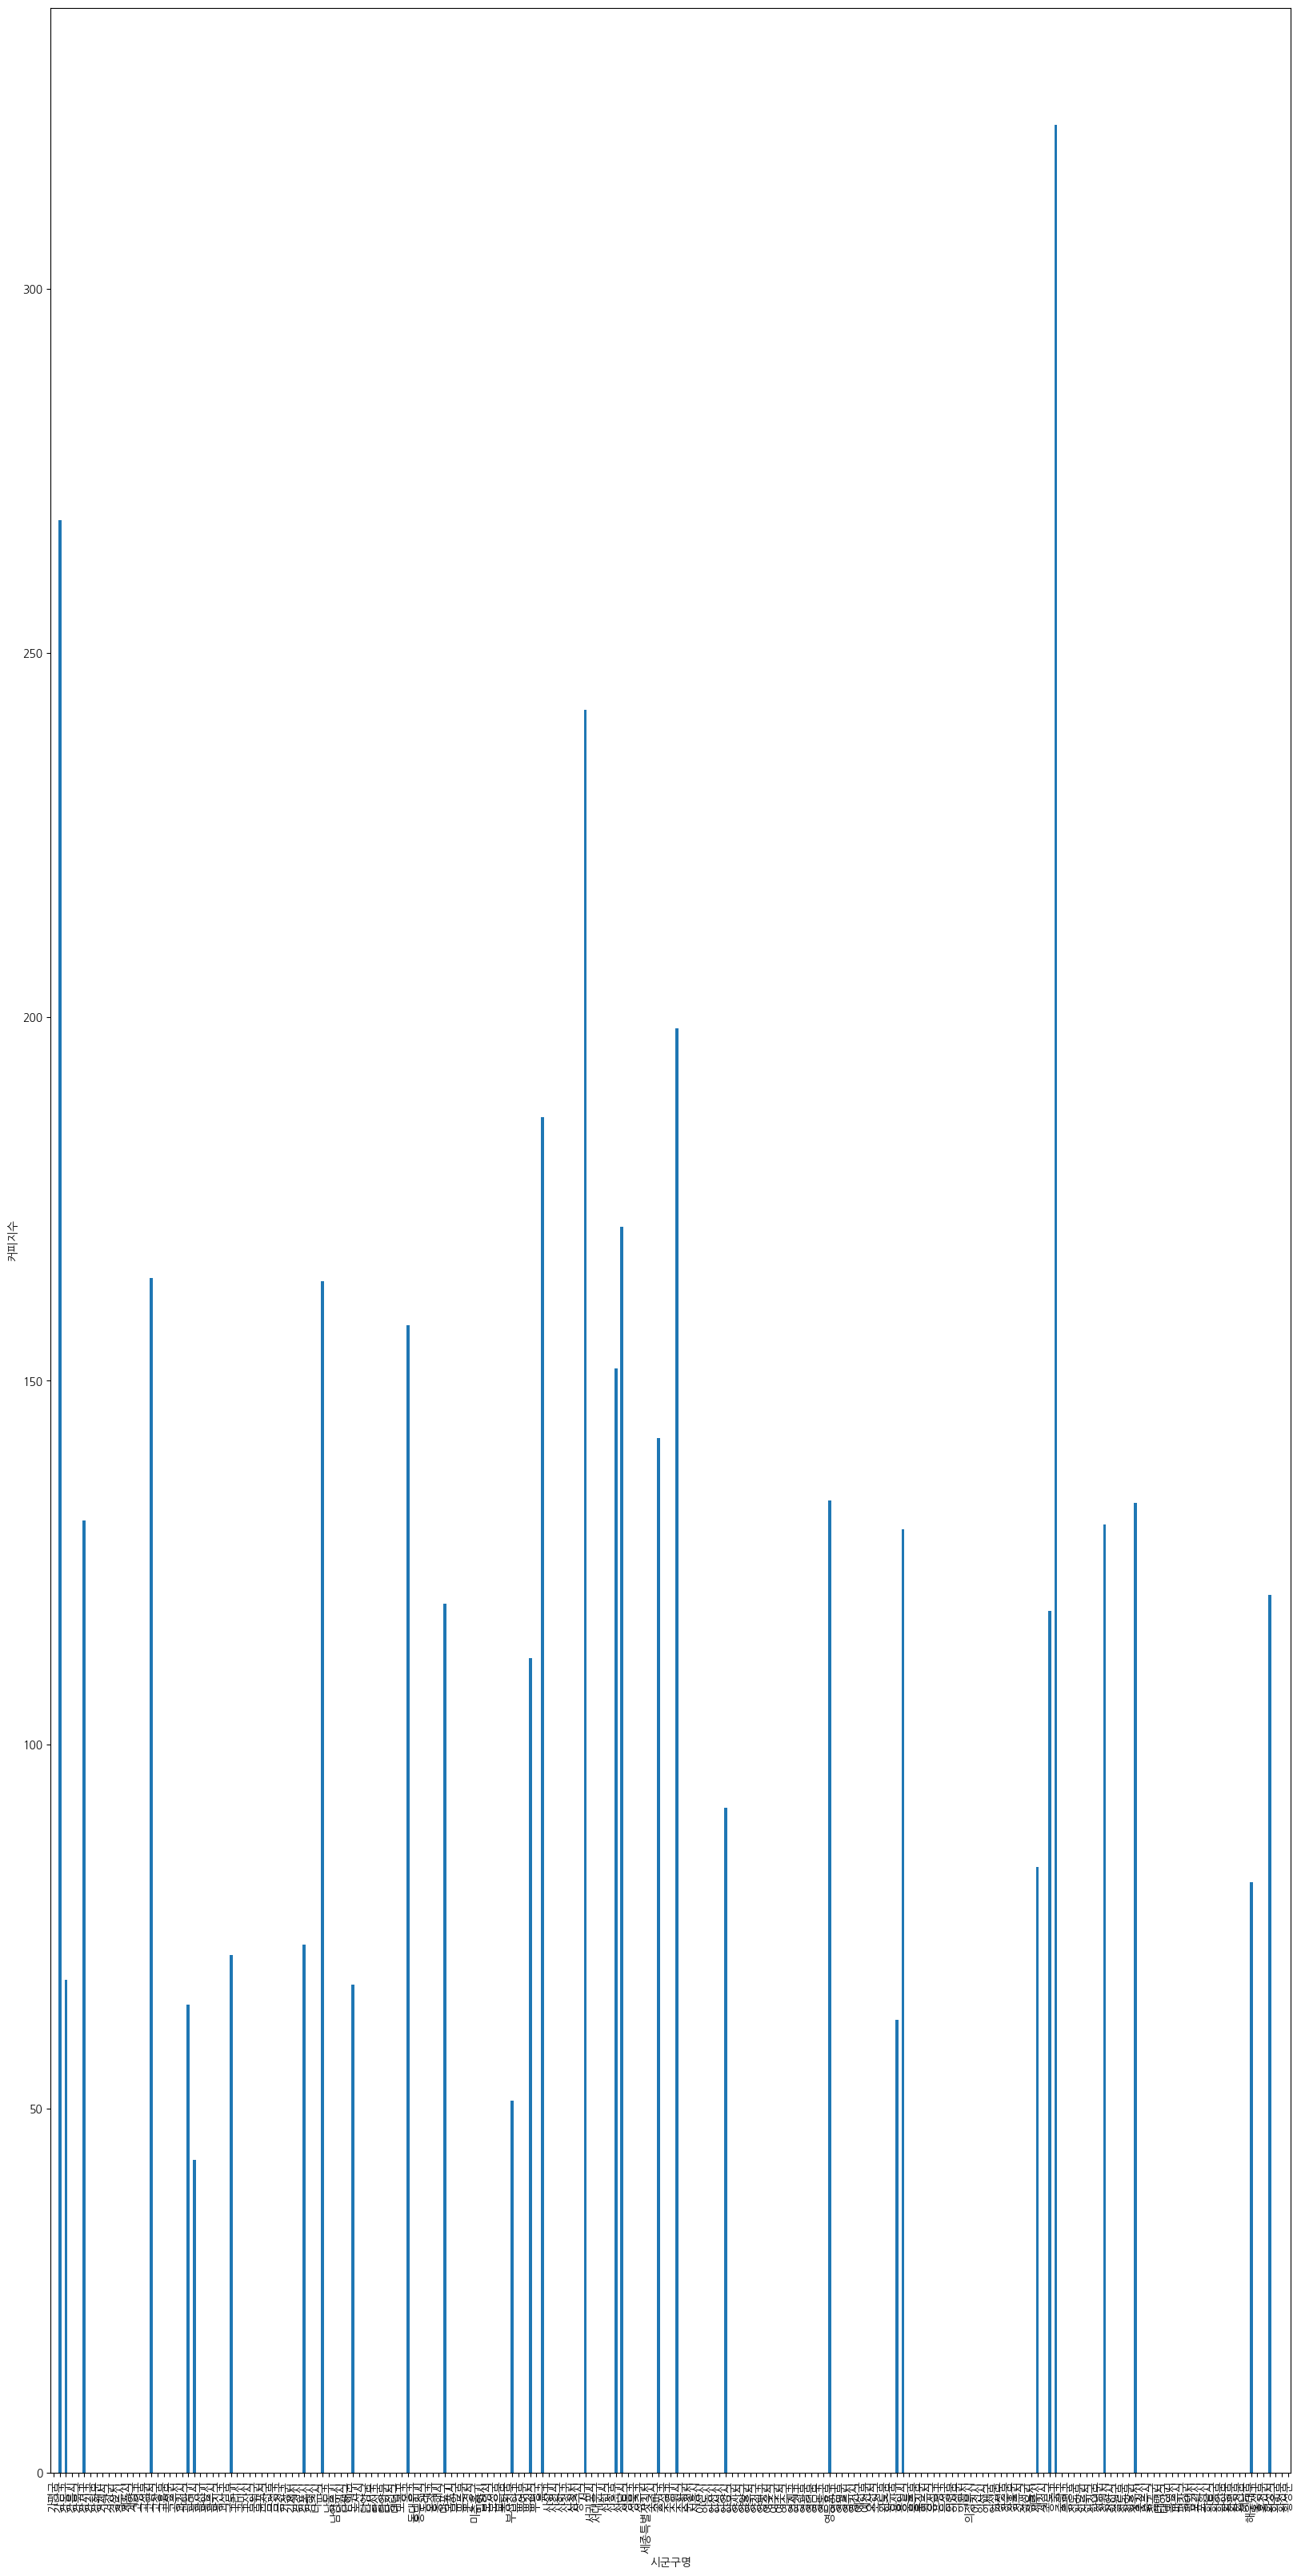

In [30]:
df_bc2.iloc[:, -1].T.plot(kind='bar', ylabel='커피지수', figsize=(20, 40));

In [97]:
df_bc["커피지수"] = (df_bc['할리스']  + df_bc['엔제리너스']
                              + df_bc['스타벅스'] + df_bc['커피빈']*1.11
                             + df_bc['투썸플레이스'] + df_bc['파스쿠찌']*0.92
                           + df_bc['폴바셋']*1.03 + df_bc['이디야']*0.66) + (df_bc['빽다방']*0.30
                                                        + df_bc['메가커피']*0.21                                                           
                                                          + df_bc['컴포즈커피']*0.21)

df_bc = df_bc.fillna(0)
df_bc.sort_values(by="커피지수", ascending=False)

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,...,합계,커피지수,커피지수2,지역낙후,커피지수3,상가,커피지수4,경도,위도,15세이상인구
시도명,,,,,,,,,,,,,,,,,,,,,
서울특별시,512.0,260.0,601.0,60.0,708.0,167.0,308.0,366.0,58.0,62.0,...,3230.0,2175.07,0.451427,76.98,28.255001,8352,0.260425,126.997050,37.844855,8454
경기도,725.0,335.0,422.0,42.0,636.0,44.0,465.0,367.0,84.0,33.0,...,3274.0,1882.27,0.254284,90.24,20.858488,7927,0.237450,127.032318,37.418940,11939
부산광역시,95.0,24.0,134.0,33.0,130.0,8.0,253.0,81.0,28.0,6.0,...,826.0,488.90,0.281823,48.27,10.128444,3414,0.143204,129.066641,35.169148,2935
인천광역시,215.0,109.0,70.0,7.0,90.0,8.0,189.0,91.0,24.0,4.0,...,826.0,399.02,0.135100,49.14,8.120065,1959,0.203686,126.646372,37.484442,2600
경상남도,63.0,36.0,70.0,21.0,141.0,3.0,205.0,66.0,25.0,3.0,...,658.0,371.56,0.238105,52.02,7.142637,2530,0.146862,128.565550,35.199564,2848
대구광역시,30.0,57.0,79.0,21.0,71.0,1.0,34.0,92.0,42.0,5.0,...,457.0,339.30,0.729552,43.38,7.821577,2621,0.129454,128.583161,35.857307,2075
광주광역시,99.0,22.0,62.0,25.0,77.0,3.0,111.0,46.0,27.0,3.0,...,490.0,280.78,0.223634,33.94,8.272834,1514,0.185456,126.869270,35.163187,1280
경상북도,39.0,37.0,54.0,19.0,70.0,0.0,50.0,62.0,38.0,1.0,...,386.0,262.98,0.443467,53.59,4.907259,2213,0.118834,128.840011,36.151586,2322
대전광역시,45.0,77.0,61.0,12.0,45.0,1.0,17.0,66.0,26.0,4.0,...,374.0,253.97,0.502532,32.99,7.698393,1343,0.189106,127.389747,36.349595,1290


In [32]:
# '시도명'이 '서울특별시'인 행들만 추출
df_seoul = df[df['시도명'] == '서울특별시']

# '시군구명'과 '브랜드명'을 groupby
df_seoul_grouped = df_seoul.groupby(['시군구명', '브랜드명']).size().unstack(fill_value=0)

# '합계' 열 추가
df_seoul_grouped['합계'] = df_seoul_grouped.sum(axis=1)

# 결과 출력
df_seoul_grouped

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,할리스,합계
시군구명,,,,,,,,,,,,
강남구,21,17,88,1,44,50,19,42,12,12,16,322
강동구,22,10,17,1,26,4,12,12,1,2,3,110
강북구,20,9,6,2,20,1,2,7,0,0,2,69
강서구,35,17,25,3,42,4,27,19,5,4,2,183
관악구,18,11,12,4,28,2,13,8,3,1,6,106
광진구,14,10,19,2,24,4,16,12,1,0,5,107
구로구,28,13,14,1,29,2,19,11,1,4,5,127
금천구,13,8,13,2,23,2,16,11,0,0,2,90
노원구,28,14,14,2,29,3,8,11,2,1,3,115


In [111]:
df_seoul_grouped.to_csv('서울매장수.csv')

In [33]:
# 서울특별시의 자치구별 커피지수 구해보기
# 브랜드 1ml당 가격
df_seoul_grouped["커피지수"] = (df_seoul_grouped['할리스'] + df_seoul_grouped['스타벅스'] + df_seoul_grouped['엔제리너스']
                            + df_seoul_grouped['커피빈']*1.11 + df_seoul_grouped['투썸플레이스'] 
                            + df_seoul_grouped['파스쿠찌']*0.92  + df_seoul_grouped['폴바셋']*1.03 
                            + df_seoul_grouped['이디야']*0.66  + df_seoul_grouped['빽다방']*0.30
                            + df_seoul_grouped['메가커피']*0.21 + df_seoul_grouped['컴포즈커피']*0.21)
df_seoul_grouped = df_seoul_grouped.fillna(0)
df_seoul_grouped.sort_values(by="커피지수", ascending=False)

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,할리스,합계,커피지수
시군구명,,,,,,,,,,,,,
강남구,21,17,88,1,44,50,19,42,12,12,16,322,268.44
중구,17,6,55,6,30,13,11,32,3,8,9,190,154.91
서초구,12,12,48,1,29,20,8,28,7,10,9,184,151.88
송파구,32,17,34,10,39,14,19,30,1,4,6,206,142.13
영등포구,26,10,41,4,41,11,14,21,3,6,8,185,133.61
마포구,27,11,35,3,34,7,15,25,1,3,10,171,119.34
종로구,16,8,40,5,31,15,8,12,3,3,11,152,118.40
강서구,35,17,25,3,42,4,27,19,5,4,2,183,108.00
구로구,28,13,14,1,29,2,19,11,1,4,5,127,71.17


In [34]:
df_seoul_grouped.to_csv("커피지수1.csv")

In [35]:
# 저가/고가형 커피를 나눌수있는 아메키라노(hot) ml/원 지수
커피빈= (5000 / 355)
폴바셋= (4 / 4700)
할리스= (354 / 4500)
스타벅스= (355 / 4500)
투썸= (355 / 4500)
엔제리너스= (355 / 4500)
파스쿠찌= (385 / 4500)
이디야= (384 / 3200)
빽다방= (400 / 1500)
메가커피= (567 / 1500)
컴포즈커피= (567 / 1500)

In [36]:
# df_sido = pd.crosstab(df['시도명'],df['브랜드명'],margins = True , margins_name = '합계')
# margins=True -> 총계를 담은 행과 열의 이름지정, margins_name='합계' 합계로 지정

In [37]:
df_bc["커피지수"] = (df_bc['할리스'] + df_bc['스타벅스'] + df_bc['엔제리너스']
                            + df_bc['커피빈']*1.11 + df_bc['투썸플레이스'] + df_bc['파스쿠찌']*0.92
                            + df_bc['폴바셋']*1.03 + df_bc['빽다방']*0.30 + df_bc['이디야']*0.66
                                                         + df_bc['메가커피']*0.21 + df_bc['컴포즈커피']*0.21)
df_bc = df_bc.fillna(0)
df_bc.sort_values(by="커피지수", ascending=False)

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,할리스,합계,커피지수
시도명,,,,,,,,,,,,,
서울특별시,512.0,260.0,601.0,60.0,708.0,167.0,308.0,366.0,58.0,62.0,128.0,3230.0,2175.07
경기도,725.0,335.0,422.0,42.0,636.0,44.0,465.0,367.0,84.0,33.0,121.0,3274.0,1882.27
부산광역시,95.0,24.0,134.0,33.0,130.0,8.0,253.0,81.0,28.0,6.0,34.0,826.0,488.90
인천광역시,215.0,109.0,70.0,7.0,90.0,8.0,189.0,91.0,24.0,4.0,19.0,826.0,399.02
경상남도,63.0,36.0,70.0,21.0,141.0,3.0,205.0,66.0,25.0,3.0,25.0,658.0,371.56
대구광역시,30.0,57.0,79.0,21.0,71.0,1.0,34.0,92.0,42.0,5.0,25.0,457.0,339.30
광주광역시,99.0,22.0,62.0,25.0,77.0,3.0,111.0,46.0,27.0,3.0,15.0,490.0,280.78
경상북도,39.0,37.0,54.0,19.0,70.0,0.0,50.0,62.0,38.0,1.0,16.0,386.0,262.98
대전광역시,45.0,77.0,61.0,12.0,45.0,1.0,17.0,66.0,26.0,4.0,20.0,374.0,253.97


In [38]:
df_bc.to_csv('전국커피지수.csv')

In [39]:
# 커피지수는 도시의 발전정도를 보여줄 수 있다.
# 커피지수1은 매장수가 많으면 높게 나올수 밖에 없음
# 그래서 유동인구, 인구수, 발전정도 등 예상 가능한 수치들과 당연히 비례관계이다

## 커피지수 2
 - (고가형/저가형)의 공식을 기반으로한다.
 - 1ml당 가격을 구한 후 편차,분산을 구하고, 각 브랜드에 분산을 곱한다.(분모를 키워보기위한 시도)
 - 그냥 (고가형/저가형)을 구했던 결과와 큰 차이가 없다
 - 편차의 제곱이 분산이 아니다.(편차 제곱의 평균이 분산이다). 따라서 의미없는 수치였음
 
 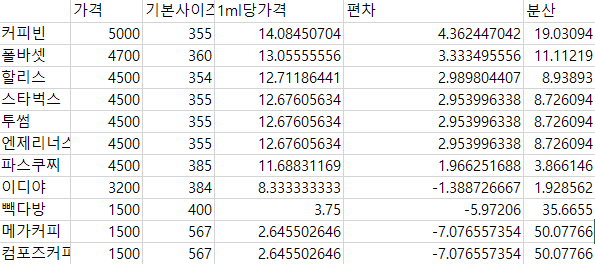

In [40]:
df_bc["커피지수2"] = (df_bc['할리스']*8.93*9 + df_bc['스타벅스']*8.72 + df_bc['엔제리너스']*8.72
                            + df_bc['커피빈']*19.03 + df_bc['투썸플레이스']*8.72 + df_bc['파스쿠찌']*3.86
                            + df_bc['폴바셋']*11.11) / (df_bc['빽다방']*35.66 + df_bc['이디야']*1.92
                                                         + df_bc['메가커피']*50.07 + df_bc['컴포즈커피']*50.07)
df_bc = df_bc.fillna(0)
df_bc.sort_values(by="커피지수", ascending=False)

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,할리스,합계,커피지수,커피지수2
시도명,,,,,,,,,,,,,,
서울특별시,512.0,260.0,601.0,60.0,708.0,167.0,308.0,366.0,58.0,62.0,128.0,3230.0,2175.07,0.451427
경기도,725.0,335.0,422.0,42.0,636.0,44.0,465.0,367.0,84.0,33.0,121.0,3274.0,1882.27,0.254284
부산광역시,95.0,24.0,134.0,33.0,130.0,8.0,253.0,81.0,28.0,6.0,34.0,826.0,488.90,0.281823
인천광역시,215.0,109.0,70.0,7.0,90.0,8.0,189.0,91.0,24.0,4.0,19.0,826.0,399.02,0.135100
경상남도,63.0,36.0,70.0,21.0,141.0,3.0,205.0,66.0,25.0,3.0,25.0,658.0,371.56,0.238105
대구광역시,30.0,57.0,79.0,21.0,71.0,1.0,34.0,92.0,42.0,5.0,25.0,457.0,339.30,0.729552
광주광역시,99.0,22.0,62.0,25.0,77.0,3.0,111.0,46.0,27.0,3.0,15.0,490.0,280.78,0.223634
경상북도,39.0,37.0,54.0,19.0,70.0,0.0,50.0,62.0,38.0,1.0,16.0,386.0,262.98,0.443467
대전광역시,45.0,77.0,61.0,12.0,45.0,1.0,17.0,66.0,26.0,4.0,20.0,374.0,253.97,0.502532


In [100]:
# df_bc['지역낙후'] = [38.87, 90.24, 52.02, 53.59, 33.94, 43.38, 32.99, 48.27, 76.98, 50, 37.03, 49.14, 48.90, 41.32,
#                  58.93, 52.10, 42.31 ]
# df_bc

#새로운 지역낙후지수(2020)

df_bc['지역낙후'] = [130682, 2.8762, 2.1345, 1.584, 3.1407, 2.8683, 3.0056, 3.009, 3.4181,
             2.4064, 2.8414, 2.921, 1, 1.8276, 1.6606, 1.9013, 2.0898]
df_bc

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,...,합계,커피지수,커피지수2,지역낙후,커피지수3,상가,커피지수4,경도,위도,15세이상인구
시도명,,,,,,,,,,,,,,,,,,,,,
강원도,72.0,33.0,31.0,4.0,128.0,1.0,51.0,60.0,14.0,0.0,...,409.0,244.20,0.277929,130682.0000,6.282480,1517,0.160976,128.122042,37.699780,1325
경기도,725.0,335.0,422.0,42.0,636.0,44.0,465.0,367.0,84.0,33.0,...,3274.0,1882.27,0.254284,2.8762,20.858488,7927,0.237450,127.032318,37.418940,11939
경상남도,63.0,36.0,70.0,21.0,141.0,3.0,205.0,66.0,25.0,3.0,...,658.0,371.56,0.238105,2.1345,7.142637,2530,0.146862,128.565550,35.199564,2848
경상북도,39.0,37.0,54.0,19.0,70.0,0.0,50.0,62.0,38.0,1.0,...,386.0,262.98,0.443467,1.5840,4.907259,2213,0.118834,128.840011,36.151586,2322
광주광역시,99.0,22.0,62.0,25.0,77.0,3.0,111.0,46.0,27.0,3.0,...,490.0,280.78,0.223634,3.1407,8.272834,1514,0.185456,126.869270,35.163187,1280
대구광역시,30.0,57.0,79.0,21.0,71.0,1.0,34.0,92.0,42.0,5.0,...,457.0,339.30,0.729552,2.8683,7.821577,2621,0.129454,128.583161,35.857307,2075
대전광역시,45.0,77.0,61.0,12.0,45.0,1.0,17.0,66.0,26.0,4.0,...,374.0,253.97,0.502532,3.0056,7.698393,1343,0.189106,127.389747,36.349595,1290
부산광역시,95.0,24.0,134.0,33.0,130.0,8.0,253.0,81.0,28.0,6.0,...,826.0,488.90,0.281823,3.0090,10.128444,3414,0.143204,129.066641,35.169148,2935
서울특별시,512.0,260.0,601.0,60.0,708.0,167.0,308.0,366.0,58.0,62.0,...,3230.0,2175.07,0.451427,3.4181,28.255001,8352,0.260425,126.997050,37.844855,8454


## 커피지수3
- 매장수에 큰 영향을 받지않으면서 발전정도에 비례하는 지수를 찾아야한다.
- (고가형커피/저가형커피)인 경우 원하는 결과(서울이 1등)이 나오지 않는다.
- 지역별 매장수를 지역별(인구수, 발전정도, 매출액 등)으로 나눠보면 좋지않을까? 
- 지역별 특성을 고려한 지역낙후지수라는 자료를 발견
- 커피지수1을 지역낙후지수로 나눠보면 매장수의 영향에서 조금 벗어나지 않을까?
- 문제점: 전문적인 데이터가 아니더라도 내가 직접 데이터를 분석해보는것이 의미있지 않을까?
- 문제점2: 세종특별자치시를 반영하지 못한다.
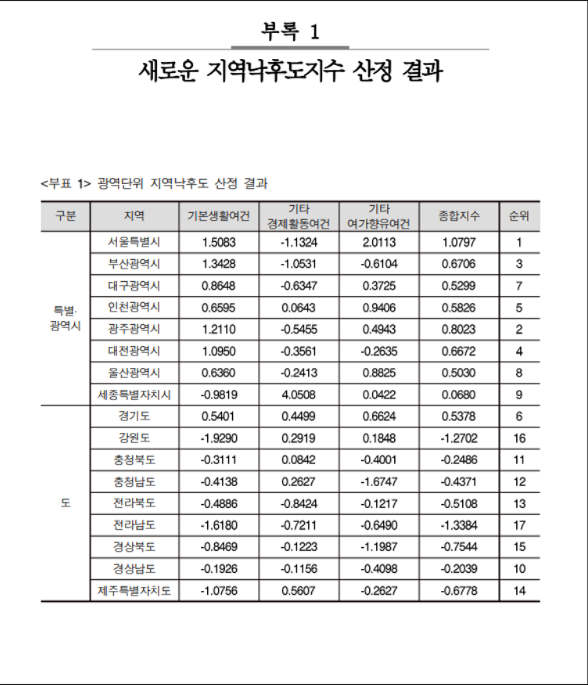


In [42]:
df_bc["커피지수3"] = (df_bc['할리스'] + df_bc['스타벅스'] + df_bc['엔제리너스']
                            + df_bc['커피빈']*1.11 + df_bc['투썸플레이스'] + df_bc['파스쿠찌']*0.92
                            + df_bc['폴바셋']*1.03 + df_bc['빽다방']*0.30 + df_bc['이디야']*0.66
                                                         + df_bc['메가커피']*0.21 + df_bc['컴포즈커피']*0.21) / df_bc['지역낙후'] 
df_bc = df_bc.fillna(0)
df_bc.sort_values(by="커피지수3", ascending=False)

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,할리스,합계,커피지수,커피지수2,지역낙후,커피지수3
시도명,,,,,,,,,,,,,,,,
서울특별시,512.0,260.0,601.0,60.0,708.0,167.0,308.0,366.0,58.0,62.0,128.0,3230.0,2175.07,0.451427,76.98,28.255001
경기도,725.0,335.0,422.0,42.0,636.0,44.0,465.0,367.0,84.0,33.0,121.0,3274.0,1882.27,0.254284,90.24,20.858488
부산광역시,95.0,24.0,134.0,33.0,130.0,8.0,253.0,81.0,28.0,6.0,34.0,826.0,488.90,0.281823,48.27,10.128444
광주광역시,99.0,22.0,62.0,25.0,77.0,3.0,111.0,46.0,27.0,3.0,15.0,490.0,280.78,0.223634,33.94,8.272834
인천광역시,215.0,109.0,70.0,7.0,90.0,8.0,189.0,91.0,24.0,4.0,19.0,826.0,399.02,0.135100,49.14,8.120065
대구광역시,30.0,57.0,79.0,21.0,71.0,1.0,34.0,92.0,42.0,5.0,25.0,457.0,339.30,0.729552,43.38,7.821577
대전광역시,45.0,77.0,61.0,12.0,45.0,1.0,17.0,66.0,26.0,4.0,20.0,374.0,253.97,0.502532,32.99,7.698393
경상남도,63.0,36.0,70.0,21.0,141.0,3.0,205.0,66.0,25.0,3.0,25.0,658.0,371.56,0.238105,52.02,7.142637
강원도,72.0,33.0,31.0,4.0,128.0,1.0,51.0,60.0,14.0,0.0,15.0,409.0,244.20,0.277929,38.87,6.282480


## 커피지수4
- 매장수를 면적으로 나누게되면 산지나 공지가 있어서 오차가 발생한다는 의견
- 부동산으로 접근했을 때 카페는 대부분 상가에 있기 때문에 상가 정보가 필요하다고 생각
- 전국 상가정보(중대형, 소규모, 집합상가), 오피스상권 데이터(22.3/4)를 가져옴
- 시군구가 아닌 상권별로 나눠져있어서 도 단위의 전국데이터에만 사용가능
- 상가의 동수, 평균층수, 평균연면적이 있으나 평균층수와 연면적은 지역의 특성을 나타내지 못한다고 판단
- 상가의 건물동수와 오피스상권의 건물동수의 총합을 커피지수1로 나눠보면 유의미한 결과를 도출하지 않을까?
- 문제점: 상가가 아닌곳에 카페가 있는 경우를 포함하지 못한다
- 문제점2: 제주도의 상가수가 너무 적어서 커피지수4가 가장 높게 나온다.
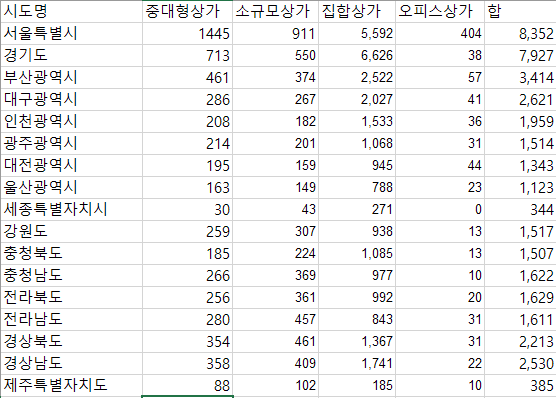
https://kosis.kr/statHtml/statHtml.do?orgId=408&tblId=DT_40801_N3101_05&vw_cd=MT_ZTITLE&list_id=I2_5_001_002_003&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE


In [43]:
sanga = pd.read_csv('sanga.csv', encoding='cp949')
sanga

,상권별(1),상권별(2),상권별(3),항목,2022.3/4,2022.4/4
0,전국,소계,소계,호수 (호),29500,29500
1,전국,소계,소계,평균층수 (층),5,5
2,전국,소계,소계,평균임대면적 (㎡),146,146
3,서울,소계,소계,호수 (호),5592,5592
4,서울,소계,소계,평균층수 (층),6,6
...,...,...,...,...,...,...
727,제주,광양사거리,소계,평균층수 (층),4,4
728,제주,광양사거리,소계,평균임대면적 (㎡),139,139
729,제주,노형오거리,소계,호수 (호),50,50
730,제주,노형오거리,소계,평균층수 (층),7,7


In [44]:

dong = sanga[(sanga['상권별(2)'] == '소계') & (sanga['상권별(3)'] == '소계') & (sanga['항목'] == '동수(동)')]
dong

,상권별(1),상권별(2),상권별(3),항목,2022.3/4,2022.4/4


In [45]:
sanga.columns

Index(['상권별(1)', '상권별(2)', '상권별(3)', '항목', '2022.3/4', '2022.4/4'], dtype='object')

In [46]:
office = pd.read_csv('office.csv', encoding='cp949')
office

,상권별(1),상권별(2),상권별(3),항목,2022.3/4,2022.4/4
0,전국,소계,소계,동수 (동),824,824
1,전국,소계,소계,평균층수 (층),10,10
2,전국,소계,소계,평균연면적 (㎡),10114,10127
3,서울,소계,소계,동수 (동),404,404
4,서울,소계,소계,평균층수 (층),11,11
...,...,...,...,...,...,...
214,경남,소계,소계,평균층수 (층),7,7
215,경남,소계,소계,평균연면적 (㎡),5557,5557
216,제주,소계,소계,동수 (동),10,10
217,제주,소계,소계,평균층수 (층),7,7


In [47]:
df_bc['상가'] = [1517, 7927, 2530, 2213, 1514, 2621, 1343, 3414, 8352, 344, 1123, 1959, 1611, 1629, 385, 1622, 1507]
df_bc

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,할리스,합계,커피지수,커피지수2,지역낙후,커피지수3,상가
시도명,,,,,,,,,,,,,,,,,
강원도,72.0,33.0,31.0,4.0,128.0,1.0,51.0,60.0,14.0,0.0,15.0,409.0,244.20,0.277929,38.87,6.282480,1517
경기도,725.0,335.0,422.0,42.0,636.0,44.0,465.0,367.0,84.0,33.0,121.0,3274.0,1882.27,0.254284,90.24,20.858488,7927
경상남도,63.0,36.0,70.0,21.0,141.0,3.0,205.0,66.0,25.0,3.0,25.0,658.0,371.56,0.238105,52.02,7.142637,2530
경상북도,39.0,37.0,54.0,19.0,70.0,0.0,50.0,62.0,38.0,1.0,16.0,386.0,262.98,0.443467,53.59,4.907259,2213
광주광역시,99.0,22.0,62.0,25.0,77.0,3.0,111.0,46.0,27.0,3.0,15.0,490.0,280.78,0.223634,33.94,8.272834,1514
대구광역시,30.0,57.0,79.0,21.0,71.0,1.0,34.0,92.0,42.0,5.0,25.0,457.0,339.30,0.729552,43.38,7.821577,2621
대전광역시,45.0,77.0,61.0,12.0,45.0,1.0,17.0,66.0,26.0,4.0,20.0,374.0,253.97,0.502532,32.99,7.698393,1343
부산광역시,95.0,24.0,134.0,33.0,130.0,8.0,253.0,81.0,28.0,6.0,34.0,826.0,488.90,0.281823,48.27,10.128444,3414
서울특별시,512.0,260.0,601.0,60.0,708.0,167.0,308.0,366.0,58.0,62.0,128.0,3230.0,2175.07,0.451427,76.98,28.255001,8352


In [48]:
df_bc["커피지수4"] = (df_bc['할리스'] + df_bc['스타벅스'] + df_bc['엔제리너스']
                            + df_bc['커피빈']*1.11 + df_bc['투썸플레이스'] + df_bc['파스쿠찌']*0.92
                            + df_bc['폴바셋']*1.03 + df_bc['빽다방']*0.30 + df_bc['이디야']*0.66
                                                         + df_bc['메가커피']*0.21 + df_bc['컴포즈커피']*0.21) / df_bc['상가'] 
df_bc = df_bc.fillna(0)
df_bc_4 = df_bc.sort_values(by="커피지수4", ascending=False)
df_bc_4

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,할리스,합계,커피지수,커피지수2,지역낙후,커피지수3,상가,커피지수4
시도명,,,,,,,,,,,,,,,,,,
제주특별자치도,33.0,32.0,26.0,8.0,20.0,2.0,25.0,22.0,20.0,2.0,3.0,193.0,116.66,0.212292,58.93,1.979637,385,0.303013
서울특별시,512.0,260.0,601.0,60.0,708.0,167.0,308.0,366.0,58.0,62.0,128.0,3230.0,2175.07,0.451427,76.98,28.255001,8352,0.260425
경기도,725.0,335.0,422.0,42.0,636.0,44.0,465.0,367.0,84.0,33.0,121.0,3274.0,1882.27,0.254284,90.24,20.858488,7927,0.237450
인천광역시,215.0,109.0,70.0,7.0,90.0,8.0,189.0,91.0,24.0,4.0,19.0,826.0,399.02,0.135100,49.14,8.120065,1959,0.203686
대전광역시,45.0,77.0,61.0,12.0,45.0,1.0,17.0,66.0,26.0,4.0,20.0,374.0,253.97,0.502532,32.99,7.698393,1343,0.189106
광주광역시,99.0,22.0,62.0,25.0,77.0,3.0,111.0,46.0,27.0,3.0,15.0,490.0,280.78,0.223634,33.94,8.272834,1514,0.185456
세종특별자치시,13.0,17.0,12.0,2.0,21.0,0.0,3.0,14.0,7.0,0.0,4.0,93.0,60.76,0.409392,50.00,1.215200,344,0.176628
울산광역시,8.0,11.0,34.0,11.0,81.0,0.0,39.0,31.0,30.0,1.0,15.0,261.0,186.26,0.687739,37.03,5.029976,1123,0.165859
강원도,72.0,33.0,31.0,4.0,128.0,1.0,51.0,60.0,14.0,0.0,15.0,409.0,244.20,0.277929,38.87,6.282480,1517,0.160976


In [49]:
df_bc.shape

(17, 18)

In [50]:
# 커피지수4 시각화

sns.heatmap(df_bc_4.iloc[:, [18]], annot=True, cmap="Blues")
plt.xlabel('') # xlabel 제거

IndexError: positional indexers are out-of-bounds

In [51]:
df_bc['경도'] = [128.122042, 127.0323175, 128.565550, 128.840011, 126.869270, 128.583161, 127.389747, 129.066641,
              126.997050, 127.286719, 129.323203, 126.646372, 127.165647, 127.028754, 126.563283, 126.973233, 127.565060]
df_bc['위도'] = [37.699780, 37.418940, 35.199564, 36.151586, 35.163187, 35.857307, 36.349595, 35.169148, 37.844855,
              36.512992, 35.558196, 37.484442, 34.891597, 35.839350, 33.442168, 36.678046, 36.708280]
df_bc

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,할리스,합계,커피지수,커피지수2,지역낙후,커피지수3,상가,커피지수4,경도,위도
시도명,,,,,,,,,,,,,,,,,,,,
강원도,72.0,33.0,31.0,4.0,128.0,1.0,51.0,60.0,14.0,0.0,15.0,409.0,244.20,0.277929,38.87,6.282480,1517,0.160976,128.122042,37.699780
경기도,725.0,335.0,422.0,42.0,636.0,44.0,465.0,367.0,84.0,33.0,121.0,3274.0,1882.27,0.254284,90.24,20.858488,7927,0.237450,127.032318,37.418940
경상남도,63.0,36.0,70.0,21.0,141.0,3.0,205.0,66.0,25.0,3.0,25.0,658.0,371.56,0.238105,52.02,7.142637,2530,0.146862,128.565550,35.199564
경상북도,39.0,37.0,54.0,19.0,70.0,0.0,50.0,62.0,38.0,1.0,16.0,386.0,262.98,0.443467,53.59,4.907259,2213,0.118834,128.840011,36.151586
광주광역시,99.0,22.0,62.0,25.0,77.0,3.0,111.0,46.0,27.0,3.0,15.0,490.0,280.78,0.223634,33.94,8.272834,1514,0.185456,126.869270,35.163187
대구광역시,30.0,57.0,79.0,21.0,71.0,1.0,34.0,92.0,42.0,5.0,25.0,457.0,339.30,0.729552,43.38,7.821577,2621,0.129454,128.583161,35.857307
대전광역시,45.0,77.0,61.0,12.0,45.0,1.0,17.0,66.0,26.0,4.0,20.0,374.0,253.97,0.502532,32.99,7.698393,1343,0.189106,127.389747,36.349595
부산광역시,95.0,24.0,134.0,33.0,130.0,8.0,253.0,81.0,28.0,6.0,34.0,826.0,488.90,0.281823,48.27,10.128444,3414,0.143204,129.066641,35.169148
서울특별시,512.0,260.0,601.0,60.0,708.0,167.0,308.0,366.0,58.0,62.0,128.0,3230.0,2175.07,0.451427,76.98,28.255001,8352,0.260425,126.997050,37.844855


In [52]:
import folium
from urllib.request import urlopen
import json

In [ ]:
south_korea_url = "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json"
print(south_korea_url)

In [ ]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data"
)
state_geo = f"{url}/us-states.json"
state_geo

with urlopen(state_geo) as response:
    usa_geojson = json.load(response)

usa_geojson["features"][0]['id']

In [53]:
# 이건 공식사이트의 예제임 

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data"
)
state_geo = f"{url}/us-states.json"

state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

with urlopen(state_geo) as response:
    usa_geojson = json.load(response)
    
# usa_geojson["features"][0]["id"]
# state_data

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m

In [ ]:
import plotly.express as px

fig = px.choropleth(df_bc, geojson=seoul_geojson, color="버거지수",
                    locations="시군구명", featureidkey="properties.name", labels="시군구명",
                    projection="mercator", color_continuous_scale=px.colors.colorbrewer.Blues)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

In [54]:
df_seoul_grouped.style.background_gradient()

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,할리스,합계,커피지수
시군구명,,,,,,,,,,,,,
강남구,21,17,88,1,44,50,19,42,12,12,16,322,268.440000
강동구,22,10,17,1,26,4,12,12,1,2,3,110,67.720000
강북구,20,9,6,2,20,1,2,7,0,0,2,69,38.630000
강서구,35,17,25,3,42,4,27,19,5,4,2,183,108.000000
관악구,18,11,12,4,28,2,13,8,3,1,6,106,64.300000
광진구,14,10,19,2,24,4,16,12,1,0,5,107,68.500000
구로구,28,13,14,1,29,2,19,11,1,4,5,127,71.170000
금천구,13,8,13,2,23,2,16,11,0,0,2,90,53.890000
노원구,28,14,14,2,29,3,8,11,2,1,3,115,67.100000


In [ ]:
df_bc2 = df.groupby(['시군구명'])['브랜드명'].value_counts().unstack()
df_bc2['합계'] = df_bc2.sum(axis=1)
df_bc2.head()

In [55]:
df['브랜드명'].unique()

array(['투썸플레이스', '엔제리너스', '폴바셋', '빽다방', '파스쿠찌', '컴포즈커피', '이디야', '커피빈',
       '메가커피', '스타벅스', '할리스'], dtype=object)

In [56]:
sg = pd.read_csv('sigun.csv', encoding='cp949', header=None)
sg

,0,1,2,3,4,5,6,7
0,시군구별(1),시군구별(2),2020,2020,2020,2020,2020,2020
1,시군구별(1),시군구별(2),전체,소상공인,소기업,중기업,중소기업,대기업
2,전국,소계,56599655,9688748,5676472,11367800,26733019,29866636
3,서울,소계,24588579,2039089,1103997,3587892,6730977,17857602
4,서울,종로구,2819071,86406,37742,115985,240132,2578938
...,...,...,...,...,...,...,...,...
265,경남,거창군,X,9094,4487,4220,17800,X
266,경남,합천군,X,6118,3235,2574,11927,X
267,제주,소계,316805,117048,68883,74805,260735,56070
268,제주,제주시,253236,87999,52681,61178,201859,51377


In [57]:
df_bc2

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,할리스,합계,커피지수
시군구명,,,,,,,,,,,,,
가평군,2.0,0.0,1.0,0.0,7.0,0.0,1.0,1.0,3.0,0.0,0.0,15.0,0.00
강남구,21.0,17.0,88.0,1.0,44.0,50.0,19.0,42.0,12.0,12.0,16.0,322.0,268.20
강동구,22.0,10.0,17.0,1.0,26.0,4.0,12.0,12.0,1.0,2.0,3.0,110.0,67.70
강릉시,14.0,6.0,6.0,0.0,22.0,0.0,7.0,5.0,2.0,0.0,1.0,63.0,0.00
강북구,20.0,9.0,6.0,2.0,20.0,1.0,2.0,7.0,0.0,0.0,2.0,69.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
홍천군,1.0,1.0,2.0,0.0,3.0,0.0,1.0,4.0,0.0,0.0,3.0,15.0,0.00
화성시,52.0,27.0,28.0,2.0,21.0,6.0,36.0,27.0,6.0,1.0,10.0,216.0,120.53
화순군,2.0,1.0,1.0,0.0,2.0,0.0,3.0,4.0,1.0,0.0,0.0,14.0,0.00


In [58]:
df_bc2.to_csv("b.csv", index=False)

In [59]:
pd.read_csv('b.csv')

,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,할리스,합계,커피지수
0,2.0,0.0,1.0,0.0,7.0,0.0,1.0,1.0,3.0,0.0,0.0,15.0,0.00
1,21.0,17.0,88.0,1.0,44.0,50.0,19.0,42.0,12.0,12.0,16.0,322.0,268.20
2,22.0,10.0,17.0,1.0,26.0,4.0,12.0,12.0,1.0,2.0,3.0,110.0,67.70
3,14.0,6.0,6.0,0.0,22.0,0.0,7.0,5.0,2.0,0.0,1.0,63.0,0.00
4,20.0,9.0,6.0,2.0,20.0,1.0,2.0,7.0,0.0,0.0,2.0,69.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,1.0,1.0,2.0,0.0,3.0,0.0,1.0,4.0,0.0,0.0,3.0,15.0,0.00
199,52.0,27.0,28.0,2.0,21.0,6.0,36.0,27.0,6.0,1.0,10.0,216.0,120.53
200,2.0,1.0,1.0,0.0,2.0,0.0,3.0,4.0,1.0,0.0,0.0,14.0,0.00
201,2.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,0.00


In [60]:
df_ingu = pd.read_csv('JG.csv', encoding='cp949')
df_ingu

,Unnamed: 0,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),15-64세 고용률 (%)
0,서울특별시,8454,5235,5057,178,3219,61.9,3.4,59.8,68.3
1,부산광역시,2935,1737,1677,60,1198,59.2,3.5,57.1,66.5
2,대구광역시,2075,1250,1196,54,824,60.3,4.3,57.6,66.5
3,인천광역시,2600,1675,1597,77,926,64.4,4.6,61.4,68.6
4,광주광역시,1280,773,753,20,507,60.4,2.6,58.8,65.1
5,대전광역시,1290,816,789,27,475,63.2,3.3,61.2,67.8
6,울산광역시,957,585,559,26,372,61.2,4.4,58.5,64.6
7,세종특별자치시,319,204,200,5,114,64.1,2.3,62.6,67.0
8,경기도,11939,7626,7403,222,4314,63.9,2.9,62.0,69.0
9,강원도,1325,798,741,58,527,60.3,7.3,55.9,65.6


In [61]:
df_ingu.loc[:, :'15세이상인구 (천명)']

,Unnamed: 0,15세이상인구 (천명)
0,서울특별시,8454
1,부산광역시,2935
2,대구광역시,2075
3,인천광역시,2600
4,광주광역시,1280
5,대전광역시,1290
6,울산광역시,957
7,세종특별자치시,319
8,경기도,11939
9,강원도,1325


In [62]:
df_bc

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,할리스,합계,커피지수,커피지수2,지역낙후,커피지수3,상가,커피지수4,경도,위도
시도명,,,,,,,,,,,,,,,,,,,,
강원도,72.0,33.0,31.0,4.0,128.0,1.0,51.0,60.0,14.0,0.0,15.0,409.0,244.20,0.277929,38.87,6.282480,1517,0.160976,128.122042,37.699780
경기도,725.0,335.0,422.0,42.0,636.0,44.0,465.0,367.0,84.0,33.0,121.0,3274.0,1882.27,0.254284,90.24,20.858488,7927,0.237450,127.032318,37.418940
경상남도,63.0,36.0,70.0,21.0,141.0,3.0,205.0,66.0,25.0,3.0,25.0,658.0,371.56,0.238105,52.02,7.142637,2530,0.146862,128.565550,35.199564
경상북도,39.0,37.0,54.0,19.0,70.0,0.0,50.0,62.0,38.0,1.0,16.0,386.0,262.98,0.443467,53.59,4.907259,2213,0.118834,128.840011,36.151586
광주광역시,99.0,22.0,62.0,25.0,77.0,3.0,111.0,46.0,27.0,3.0,15.0,490.0,280.78,0.223634,33.94,8.272834,1514,0.185456,126.869270,35.163187
대구광역시,30.0,57.0,79.0,21.0,71.0,1.0,34.0,92.0,42.0,5.0,25.0,457.0,339.30,0.729552,43.38,7.821577,2621,0.129454,128.583161,35.857307
대전광역시,45.0,77.0,61.0,12.0,45.0,1.0,17.0,66.0,26.0,4.0,20.0,374.0,253.97,0.502532,32.99,7.698393,1343,0.189106,127.389747,36.349595
부산광역시,95.0,24.0,134.0,33.0,130.0,8.0,253.0,81.0,28.0,6.0,34.0,826.0,488.90,0.281823,48.27,10.128444,3414,0.143204,129.066641,35.169148
서울특별시,512.0,260.0,601.0,60.0,708.0,167.0,308.0,366.0,58.0,62.0,128.0,3230.0,2175.07,0.451427,76.98,28.255001,8352,0.260425,126.997050,37.844855


In [63]:
new_ingu = df_ingu.sort_values('Unnamed: 0')['15세이상인구 (천명)']

In [64]:
new_ingu = new_ingu.to_list()

In [65]:
df_bc['15세이상인구']=new_ingu

In [66]:
df_bc

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,...,합계,커피지수,커피지수2,지역낙후,커피지수3,상가,커피지수4,경도,위도,15세이상인구
시도명,,,,,,,,,,,,,,,,,,,,,
강원도,72.0,33.0,31.0,4.0,128.0,1.0,51.0,60.0,14.0,0.0,...,409.0,244.20,0.277929,38.87,6.282480,1517,0.160976,128.122042,37.699780,1325
경기도,725.0,335.0,422.0,42.0,636.0,44.0,465.0,367.0,84.0,33.0,...,3274.0,1882.27,0.254284,90.24,20.858488,7927,0.237450,127.032318,37.418940,11939
경상남도,63.0,36.0,70.0,21.0,141.0,3.0,205.0,66.0,25.0,3.0,...,658.0,371.56,0.238105,52.02,7.142637,2530,0.146862,128.565550,35.199564,2848
경상북도,39.0,37.0,54.0,19.0,70.0,0.0,50.0,62.0,38.0,1.0,...,386.0,262.98,0.443467,53.59,4.907259,2213,0.118834,128.840011,36.151586,2322
광주광역시,99.0,22.0,62.0,25.0,77.0,3.0,111.0,46.0,27.0,3.0,...,490.0,280.78,0.223634,33.94,8.272834,1514,0.185456,126.869270,35.163187,1280
대구광역시,30.0,57.0,79.0,21.0,71.0,1.0,34.0,92.0,42.0,5.0,...,457.0,339.30,0.729552,43.38,7.821577,2621,0.129454,128.583161,35.857307,2075
대전광역시,45.0,77.0,61.0,12.0,45.0,1.0,17.0,66.0,26.0,4.0,...,374.0,253.97,0.502532,32.99,7.698393,1343,0.189106,127.389747,36.349595,1290
부산광역시,95.0,24.0,134.0,33.0,130.0,8.0,253.0,81.0,28.0,6.0,...,826.0,488.90,0.281823,48.27,10.128444,3414,0.143204,129.066641,35.169148,2935
서울특별시,512.0,260.0,601.0,60.0,708.0,167.0,308.0,366.0,58.0,62.0,...,3230.0,2175.07,0.451427,76.98,28.255001,8352,0.260425,126.997050,37.844855,8454


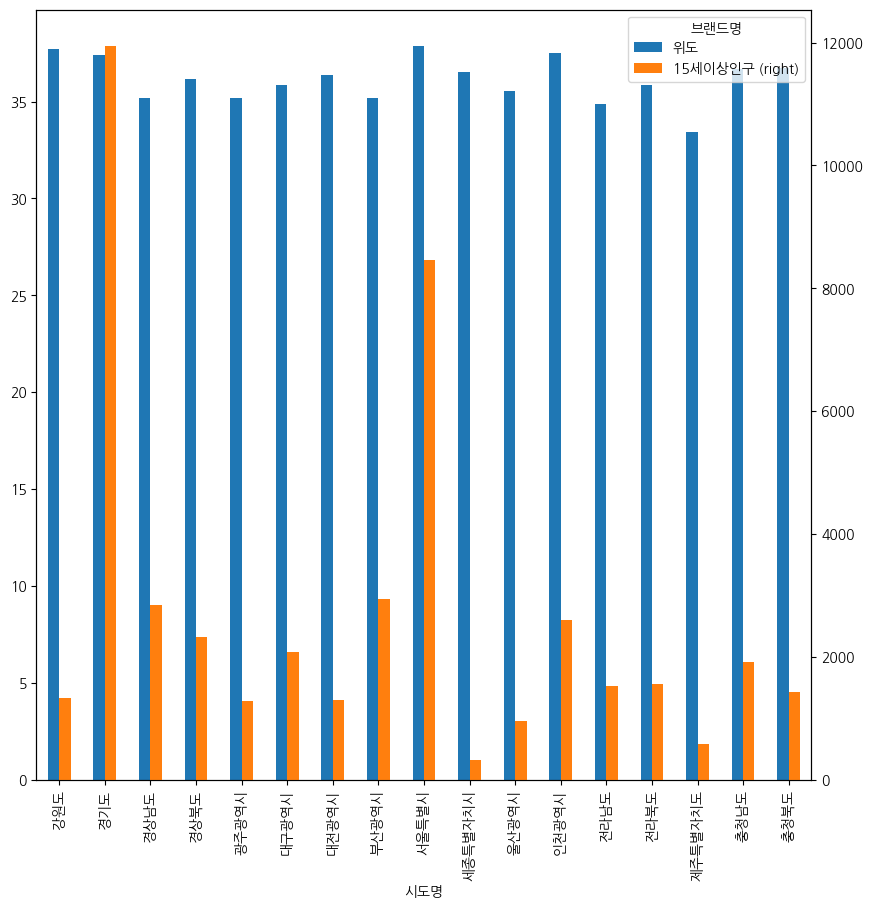

In [67]:
df_bc.iloc[:, -2:].plot(kind='bar', secondary_y='15세이상인구', figsize=(10,10));

In [ ]:
df_bc.iloc[:, -1].sort_values().plot(kind='barh')

In [110]:
five = pd.read_csv('population.csv', encoding='utf-8')
five

,행정기관코드,행정기관,시도명,시군구명,총 인구수,연령구간인구수,0~4세,5~9세,10~14세,15~19세,...,55~59세.2,60~64세.2,65~69세.2,70~74세.2,75~79세.2,80~84세.2,85~89세.2,90~94세.2,95~99세.2,100세 이상.2
0,1100000000,서울특별시,서울특별시,서울특별시,"9,424,873","9,424,873","226,004","315,591","361,785","386,434",...,"352,068","375,498","310,677","221,007","169,985","127,276","66,321","25,368","6,162","1,043"
1,1111000000,서울특별시 종로구,서울특별시,종로구,"141,223","141,223","2,494","3,823","4,742","5,335",...,"5,735","5,625","4,495","3,331","2,981","2,527","1,324",497,129,22
2,1114000000,서울특별시 중구,서울특별시,중구,"120,317","120,317","2,787","3,152","2,907","3,383",...,"4,563","4,893","4,165","2,994","2,591","2,157","1,221",492,122,19
3,1117000000,서울특별시 용산구,서울특별시,용산구,"218,412","218,412","5,466","6,420","6,696","7,533",...,"8,214","8,333","6,663","4,691","4,026","3,455","2,028",771,170,38
4,1120000000,서울특별시 성동구,서울특별시,성동구,"280,707","280,707","8,542","9,563","8,648","9,813",...,"10,616","10,961","8,682","6,020","5,108","3,916","2,100",707,155,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,4888000000,경상남도 거창군,경상남도,거창군,"60,266","60,266","1,171","2,013","2,570","3,065",...,"2,382","3,120","2,489","2,138","1,839","2,177","1,419",536,116,18
241,4889000000,경상남도 합천군,경상남도,합천군,"42,098","42,098",548,768,"1,057","1,140",...,"1,664","2,565","2,137","1,999","1,862","2,390","1,573",546,106,19
242,5000000000,제주특별자치도,제주특별자치도,제주특별자치도,"677,493","677,493","21,300","33,026","36,593","34,246",...,"26,167","25,504","19,418","13,681","11,668","10,195","6,920","3,046",739,223
243,5011000000,제주특별자치도 제주시,제주특별자치도,제주시,"492,817","492,817","16,225","24,536","27,158","25,932",...,"18,780","17,780","13,330","9,140","7,817","6,615","4,491","2,030",518,154


In [68]:
#'시도명'과'시군구명'이 같은 데이터프레임 만들기
# 인덱스 정열 및 drop=True로 이전 인덱스번호 삭제
five_same = five[five['시도명'] == five['시군구명']]
five_same = five_same.reset_index(drop=True)
five_same

NameError: name 'five' is not defined

In [69]:
# 컬럼명확인
five.columns

NameError: name 'five' is not defined

In [70]:
# 시군구명 확인
five_same.iloc[:, 3]

NameError: name 'five_same' is not defined

In [71]:
five_same.shape

NameError: name 'five_same' is not defined

In [72]:
# 컬럼을 전체, 남, 녀로 구분하기위해 확인
five_same.columns

NameError: name 'five_same' is not defined

In [73]:
# 원하는 컬럼만 가져오기
# 5세단위 전체인구
five_both = five_same.iloc[:, [2] + list(range(5, 27)) ]
five_both = five_both.rename(columns={'연령구간인구수': '전체인구수'})
five_both

NameError: name 'five_same' is not defined

In [74]:
five_man.columns

NameError: name 'five_man' is not defined

In [75]:
import re
# 5세단위 남자인구
# 컬럼명 변경(세.1 ->세)
five_man = five_same.iloc[:, [2] + list(range(28, 50)) ]
five_man = five_man.rename(columns={'연령구간인구수.1': '남자인구수', 
                                   '0~4세.1': '0~4세', '5~9세.1' : '5~9세', '10~14세.1' : '10~14세',
                                    '15~19세.1' : '15~19세', '20~24세.1' : '20~24세',
       '25~29세.1' : '25~29세', '30~34세.1' : '30~34세', '35~39세.1' : '35~39세',
                                    '40~44세.1' : '40~44세', '45~49세.1' : '45~49세', '50~54세.1': '50~54세',
       '55~59세.1' : '55~59세', '60~64세.1' : '60~64세', '65~69세.1' : '65~69세', '70~74세.1' : '70~74세',
                                    '75~79세.1' : '75~79세', '80~84세.1' : '80~84세',
       '85~89세.1' : '85~89세', '90~94세.1' : '90~94세', '95~99세.1' : '95~99세', '100세 이상.1' : '100세 이상'})
# 정규표현식을 사용하여 컬럼명 변경(X ->실패)
five_man.to_csv('five_man.csv', index=False)
pd.read_csv('five_man.csv')

NameError: name 'five_same' is not defined

In [76]:
# 5세단위 여자인구
# 컬럼명 변경(세.2 ->세)
five_woman = five_same.iloc[:, [2] + list(range(51, 73))]
five_woman = five_woman.rename(columns={'연령구간인구수.2': '여자인구수', 
                                   '0~4세.2': '0~4세', '5~9세.2' : '5~9세', '10~14세.2' : '10~14세',
                                    '15~19세.2' : '15~19세', '20~24세.2' : '20~24세',
       '25~29세.2' : '25~29세', '30~34세.2' : '30~34세', '35~39세.2' : '35~39세',
                                    '40~44세.2' : '40~44세', '45~49세.2' : '45~49세', '50~54세.2': '50~54세',
       '55~59세.2' : '55~59세', '60~64세.2' : '60~64세', '65~69세.2' : '65~69세', '70~74세.2' : '70~74세',
                                    '75~79세.2' : '75~79세', '80~84세.2' : '80~84세',
       '85~89세.2' : '85~89세', '90~94세.2' : '90~94세', '95~99세.2' : '95~99세', '100세 이상.2' : '100세 이상'})
five_woman


NameError: name 'five_same' is not defined

In [77]:
df_bc

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,...,합계,커피지수,커피지수2,지역낙후,커피지수3,상가,커피지수4,경도,위도,15세이상인구
시도명,,,,,,,,,,,,,,,,,,,,,
강원도,72.0,33.0,31.0,4.0,128.0,1.0,51.0,60.0,14.0,0.0,...,409.0,244.20,0.277929,38.87,6.282480,1517,0.160976,128.122042,37.699780,1325
경기도,725.0,335.0,422.0,42.0,636.0,44.0,465.0,367.0,84.0,33.0,...,3274.0,1882.27,0.254284,90.24,20.858488,7927,0.237450,127.032318,37.418940,11939
경상남도,63.0,36.0,70.0,21.0,141.0,3.0,205.0,66.0,25.0,3.0,...,658.0,371.56,0.238105,52.02,7.142637,2530,0.146862,128.565550,35.199564,2848
경상북도,39.0,37.0,54.0,19.0,70.0,0.0,50.0,62.0,38.0,1.0,...,386.0,262.98,0.443467,53.59,4.907259,2213,0.118834,128.840011,36.151586,2322
광주광역시,99.0,22.0,62.0,25.0,77.0,3.0,111.0,46.0,27.0,3.0,...,490.0,280.78,0.223634,33.94,8.272834,1514,0.185456,126.869270,35.163187,1280
대구광역시,30.0,57.0,79.0,21.0,71.0,1.0,34.0,92.0,42.0,5.0,...,457.0,339.30,0.729552,43.38,7.821577,2621,0.129454,128.583161,35.857307,2075
대전광역시,45.0,77.0,61.0,12.0,45.0,1.0,17.0,66.0,26.0,4.0,...,374.0,253.97,0.502532,32.99,7.698393,1343,0.189106,127.389747,36.349595,1290
부산광역시,95.0,24.0,134.0,33.0,130.0,8.0,253.0,81.0,28.0,6.0,...,826.0,488.90,0.281823,48.27,10.128444,3414,0.143204,129.066641,35.169148,2935
서울특별시,512.0,260.0,601.0,60.0,708.0,167.0,308.0,366.0,58.0,62.0,...,3230.0,2175.07,0.451427,76.98,28.255001,8352,0.260425,126.997050,37.844855,8454


In [78]:
# 마지막 컬럼삭제
df_sido = df_bc.drop('15세이상인구', axis=1)
df_sido

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,할리스,합계,커피지수,커피지수2,지역낙후,커피지수3,상가,커피지수4,경도,위도
시도명,,,,,,,,,,,,,,,,,,,,
강원도,72.0,33.0,31.0,4.0,128.0,1.0,51.0,60.0,14.0,0.0,15.0,409.0,244.20,0.277929,38.87,6.282480,1517,0.160976,128.122042,37.699780
경기도,725.0,335.0,422.0,42.0,636.0,44.0,465.0,367.0,84.0,33.0,121.0,3274.0,1882.27,0.254284,90.24,20.858488,7927,0.237450,127.032318,37.418940
경상남도,63.0,36.0,70.0,21.0,141.0,3.0,205.0,66.0,25.0,3.0,25.0,658.0,371.56,0.238105,52.02,7.142637,2530,0.146862,128.565550,35.199564
경상북도,39.0,37.0,54.0,19.0,70.0,0.0,50.0,62.0,38.0,1.0,16.0,386.0,262.98,0.443467,53.59,4.907259,2213,0.118834,128.840011,36.151586
광주광역시,99.0,22.0,62.0,25.0,77.0,3.0,111.0,46.0,27.0,3.0,15.0,490.0,280.78,0.223634,33.94,8.272834,1514,0.185456,126.869270,35.163187
대구광역시,30.0,57.0,79.0,21.0,71.0,1.0,34.0,92.0,42.0,5.0,25.0,457.0,339.30,0.729552,43.38,7.821577,2621,0.129454,128.583161,35.857307
대전광역시,45.0,77.0,61.0,12.0,45.0,1.0,17.0,66.0,26.0,4.0,20.0,374.0,253.97,0.502532,32.99,7.698393,1343,0.189106,127.389747,36.349595
부산광역시,95.0,24.0,134.0,33.0,130.0,8.0,253.0,81.0,28.0,6.0,34.0,826.0,488.90,0.281823,48.27,10.128444,3414,0.143204,129.066641,35.169148
서울특별시,512.0,260.0,601.0,60.0,708.0,167.0,308.0,366.0,58.0,62.0,128.0,3230.0,2175.07,0.451427,76.98,28.255001,8352,0.260425,126.997050,37.844855


In [79]:
df_sido.index

Index(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도',
       '충청북도'],
      dtype='object', name='시도명')

In [80]:
five_both.columns

NameError: name 'five_both' is not defined

In [81]:
df_sido

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,할리스,합계,커피지수,커피지수2,지역낙후,커피지수3,상가,커피지수4,경도,위도
시도명,,,,,,,,,,,,,,,,,,,,
강원도,72.0,33.0,31.0,4.0,128.0,1.0,51.0,60.0,14.0,0.0,15.0,409.0,244.20,0.277929,38.87,6.282480,1517,0.160976,128.122042,37.699780
경기도,725.0,335.0,422.0,42.0,636.0,44.0,465.0,367.0,84.0,33.0,121.0,3274.0,1882.27,0.254284,90.24,20.858488,7927,0.237450,127.032318,37.418940
경상남도,63.0,36.0,70.0,21.0,141.0,3.0,205.0,66.0,25.0,3.0,25.0,658.0,371.56,0.238105,52.02,7.142637,2530,0.146862,128.565550,35.199564
경상북도,39.0,37.0,54.0,19.0,70.0,0.0,50.0,62.0,38.0,1.0,16.0,386.0,262.98,0.443467,53.59,4.907259,2213,0.118834,128.840011,36.151586
광주광역시,99.0,22.0,62.0,25.0,77.0,3.0,111.0,46.0,27.0,3.0,15.0,490.0,280.78,0.223634,33.94,8.272834,1514,0.185456,126.869270,35.163187
대구광역시,30.0,57.0,79.0,21.0,71.0,1.0,34.0,92.0,42.0,5.0,25.0,457.0,339.30,0.729552,43.38,7.821577,2621,0.129454,128.583161,35.857307
대전광역시,45.0,77.0,61.0,12.0,45.0,1.0,17.0,66.0,26.0,4.0,20.0,374.0,253.97,0.502532,32.99,7.698393,1343,0.189106,127.389747,36.349595
부산광역시,95.0,24.0,134.0,33.0,130.0,8.0,253.0,81.0,28.0,6.0,34.0,826.0,488.90,0.281823,48.27,10.128444,3414,0.143204,129.066641,35.169148
서울특별시,512.0,260.0,601.0,60.0,708.0,167.0,308.0,366.0,58.0,62.0,128.0,3230.0,2175.07,0.451427,76.98,28.255001,8352,0.260425,126.997050,37.844855


In [82]:
five_both.iloc[1:, :11].plot(kind='bar', figsize=(10,10))
df.plot()

NameError: name 'five_both' is not defined

In [ ]:
df_sido.info()

In [83]:
#float이 아니어서 시각화가 안됐었다.
five_woman.info()

NameError: name 'five_woman' is not defined

In [84]:
#앞에 인덱스를 시도명으로바꿔주기
five_both.set_index('시도명')
five_man.set_index('시도명')
five_woman.set_index('시도명')

NameError: name 'five_both' is not defined

In [85]:
five_both.to_csv('five_both.csv')
five_man.to_csv('five_man.csv')
five_woman.to_csv('five_woman.csv')

NameError: name 'five_both' is not defined

In [86]:
df_sido.columns

Index(['메가커피', '빽다방', '스타벅스', '엔제리너스', '이디야', '커피빈', '컴포즈커피', '투썸플레이스', '파스쿠찌',
       '폴바셋', '할리스', '합계', '커피지수', '커피지수2', '지역낙후', '커피지수3', '상가', '커피지수4',
       '경도', '위도'],
      dtype='object', name='브랜드명')

In [87]:
five_woman.columns

NameError: name 'five_woman' is not defined

In [88]:
print(five_woman.dtypes)

NameError: name 'five_woman' is not defined

In [89]:
five_both.shape

NameError: name 'five_both' is not defined

In [90]:
# 인구수컬럼들만 float으로 변환
# 인구가 ,으로 나눠져있어서 flaot으로 바로 못바꾼다
# 따라서 쉼표를 제거 후 flaot으로 변환
#regex=True => 일괄제거(정확히 일치하지않아도됨)
five_both.iloc[:, 1:22] = five_both.iloc[:, 1:22].replace(',', '', regex=True).astype(float)
print(five_both.dtypes)

NameError: name 'five_both' is not defined

## 전국 모든 카페(개인카페 포함)(중도취소: 전처리 인원겹침)

In [91]:
#df_sido['커피지수'] = (((df_sido['커피빈'] * 5.33 + df_sido['폴바셋'] * 4.94 + df_sido['할리스'] * 4.81)
#                       + (df_sido['스타벅스'] + df_sido['투썸플레이스'] + df_sido['엔제리너스']) * 4.8 + df_sido['파스쿠찌'] * 4.42)
#                       / (df_sido['컴포즈커피'] + df_sido['메가커피'] + df_sido['빽다방'] * 1.42 + df_sido['이디야'] * 3.15)) 


In [92]:
df_ca = pd.read_csv('coffeeshop.csv', encoding='utf-8')
df_ca

,매장명,시도명,시군구명
0,미엔,대구광역시,달서구
1,메종188(MAISON188),서울특별시,관악구
2,커스텀커피 금호점,서울특별시,성동구
3,(주)맨케이브,서울특별시,마포구
4,벤티,전라남도,곡성군
...,...,...,...
95094,스타벅스동대구터미널점,대구광역시,동구
95095,메가엠지씨커피 광주봉선유안공원점,광주광역시,남구
95096,파운데이 염주점,광주광역시,서구
95097,벌크커피봉선점,광주광역시,남구


In [ ]:
df_ca.info()

In [93]:
df_ca.shape

(95099, 3)

In [94]:
# 매장명없는 데이터 찾기
df_ca = df_ca[df_ca["매장명"].notnull()].copy()
df_ca


,매장명,시도명,시군구명
0,미엔,대구광역시,달서구
1,메종188(MAISON188),서울특별시,관악구
2,커스텀커피 금호점,서울특별시,성동구
3,(주)맨케이브,서울특별시,마포구
4,벤티,전라남도,곡성군
...,...,...,...
95094,스타벅스동대구터미널점,대구광역시,동구
95095,메가엠지씨커피 광주봉선유안공원점,광주광역시,남구
95096,파운데이 염주점,광주광역시,서구
95097,벌크커피봉선점,광주광역시,남구


In [ ]:
df_ca_b = df_ca[df_ca['매장명'].str.contains(
    "스타벅스|커피빈|폴바셋|투섬|투썸|엔젤리너스|엔제리너스|파스쿠찌|파스쿠치|이디야|빽다방|메가커피|컴포즈커피|MEGA")]
df_ca_b

In [95]:
df_ca_b['매장명'].unique

NameError: name 'df_ca_b' is not defined

In [96]:
pmj = pd.read_csv('pmj_jisu.csv', encoding='utf-8')
pmj

,시군구명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,할리스,합계,커피지수
0,강남구,21,17,88,1,44,50,19,42,12,12,16,322,1.239382
1,강동구,22,10,17,1,26,4,12,12,1,2,3,110,0.913761
2,강북구,20,9,6,2,20,1,2,7,0,0,2,69,0.830270
3,강서구,35,17,25,3,42,4,27,19,5,4,2,183,0.875797
4,관악구,18,11,12,4,28,2,13,8,3,1,6,106,0.900323
5,광진구,14,10,19,2,24,4,16,12,1,0,5,107,0.950444
6,구로구,28,13,14,1,29,2,19,11,1,4,5,127,0.831457
7,금천구,13,8,13,2,23,2,16,11,0,0,2,90,0.888528
8,노원구,28,14,14,2,29,3,8,11,2,1,3,115,0.865676
9,도봉구,16,6,4,0,24,0,9,7,1,0,0,67,0.770113


In [101]:
df_bc

브랜드명,메가커피,빽다방,스타벅스,엔제리너스,이디야,커피빈,컴포즈커피,투썸플레이스,파스쿠찌,폴바셋,...,합계,커피지수,커피지수2,지역낙후,커피지수3,상가,커피지수4,경도,위도,15세이상인구
시도명,,,,,,,,,,,,,,,,,,,,,
강원도,72.0,33.0,31.0,4.0,128.0,1.0,51.0,60.0,14.0,0.0,...,409.0,244.20,0.277929,130682.0000,6.282480,1517,0.160976,128.122042,37.699780,1325
경기도,725.0,335.0,422.0,42.0,636.0,44.0,465.0,367.0,84.0,33.0,...,3274.0,1882.27,0.254284,2.8762,20.858488,7927,0.237450,127.032318,37.418940,11939
경상남도,63.0,36.0,70.0,21.0,141.0,3.0,205.0,66.0,25.0,3.0,...,658.0,371.56,0.238105,2.1345,7.142637,2530,0.146862,128.565550,35.199564,2848
경상북도,39.0,37.0,54.0,19.0,70.0,0.0,50.0,62.0,38.0,1.0,...,386.0,262.98,0.443467,1.5840,4.907259,2213,0.118834,128.840011,36.151586,2322
광주광역시,99.0,22.0,62.0,25.0,77.0,3.0,111.0,46.0,27.0,3.0,...,490.0,280.78,0.223634,3.1407,8.272834,1514,0.185456,126.869270,35.163187,1280
대구광역시,30.0,57.0,79.0,21.0,71.0,1.0,34.0,92.0,42.0,5.0,...,457.0,339.30,0.729552,2.8683,7.821577,2621,0.129454,128.583161,35.857307,2075
대전광역시,45.0,77.0,61.0,12.0,45.0,1.0,17.0,66.0,26.0,4.0,...,374.0,253.97,0.502532,3.0056,7.698393,1343,0.189106,127.389747,36.349595,1290
부산광역시,95.0,24.0,134.0,33.0,130.0,8.0,253.0,81.0,28.0,6.0,...,826.0,488.90,0.281823,3.0090,10.128444,3414,0.143204,129.066641,35.169148,2935
서울특별시,512.0,260.0,601.0,60.0,708.0,167.0,308.0,366.0,58.0,62.0,...,3230.0,2175.07,0.451427,3.4181,28.255001,8352,0.260425,126.997050,37.844855,8454


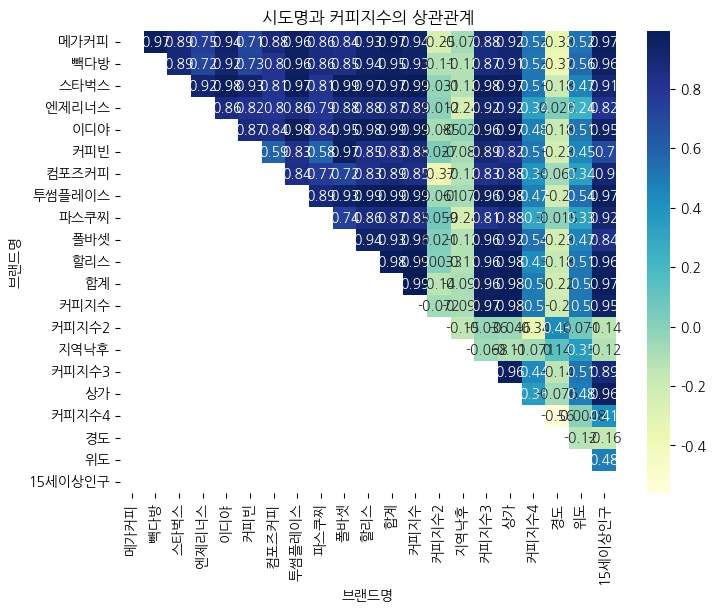

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_bc.corr()
mask = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='YlGnBu', annot=True, mask=mask)
plt.title('시도명과 커피지수의 상관관계')
plt.show()

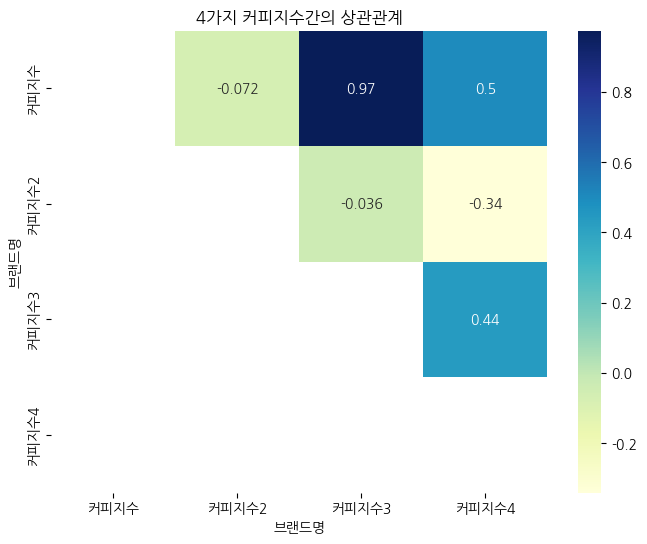

In [112]:
cols = ['커피지수', '커피지수2', '커피지수3', '커피지수4']
df_coffee_selected = df_bc[cols]

# 상관계수 구하기
corr = df_coffee_selected.corr()

# heatmap 그리기
mask = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='YlGnBu', annot=True, mask=mask)
plt.title('4가지 커피지수간의 상관관계')
plt.show()